In [1]:
import scipy.optimize
import numpy as np
from matplotlib import pylab as plt
np.random.seed(0)

In [2]:
a=1000
b=4000
c=1./2
ey = 10
f = lambda a,b,c, n: a + b * np.exp(-c * n)
f2 = lambda a,b,c,d, n: a + b*(n+d)**(-c)

In [3]:
n = np.arange(0,5,.1)
y = np.round(f(a,b,c, n)  +  np.random.normal(0,300, size=len(n)))
y2 = np.round(f2(a,b,ey,c, n)  +  np.random.normal(0,300, size=len(n)))


In [4]:
def model(p, x=n):
    return f(p[0],p[1],p[2],x)

In [5]:
def rmse(p, x=n, data=y):
    return np.sqrt(1./len(data)*np.sum((data-model(p, x))**2))

In [6]:
def model2(p, x=n):
    return f2(p[0],p[1],p[2],p[3],x)

In [7]:
def rmse2(p, x=n, data=y):
    return np.sqrt(1./len(data)*np.sum((data-model2(p, x))**2))

In [8]:
return_fit = scipy.optimize.minimize(rmse, [1000,2000,.1], method = 'Nelder-Mead')
bfit = return_fit['x'] #least_squares returns a dictionary of lot of things. We just pick 'x', which is the fitted parameters

In [9]:
return_fit2 = scipy.optimize.minimize(rmse2, [1000,2000,100,.1], method = 'Nelder-Mead')
bfit2 = return_fit2['x'] #least_squares returns a dictionary of lot of things. We just pick 'x', which is the fitted parameters

In [10]:
bfit

array([8.51272323e+02, 4.49612567e+03, 4.98372751e-01])

In [11]:
model2(bfit2, x=n)

array([5431.26753325, 5177.1920455 , 4941.71111349, 4722.96614493,
       4519.3312758 , 4329.3786705 , 4151.84978035, 3985.63140966,
       3829.73568413, 3683.28320496, 3545.48881775, 3415.64953833,
       3293.13426689, 3177.37499123, 3067.85923572, 2964.12355665,
       2865.74791997, 2772.35082605, 2683.58506924, 2599.13403857,
       2518.7084814 , 2442.04366443, 2368.89687676, 2299.04522831,
       2232.28370386, 2168.42343927, 2107.29019085, 2048.72297345,
       1992.57284619, 1938.7018275 , 1886.98192395, 1837.29425934,
       1789.52829209, 1743.58111101, 1699.35680031, 1656.76586626,
       1615.72471853, 1576.15520049, 1537.98416296, 1501.14307708,
       1465.56768201, 1431.197664  , 1397.97636365, 1365.85050846,
       1334.76996832, 1304.68753148, 1275.5586993 , 1247.34149781,
       1219.99630452, 1193.48568921])

[5529. 3469. 1706. 1939. 1227.]


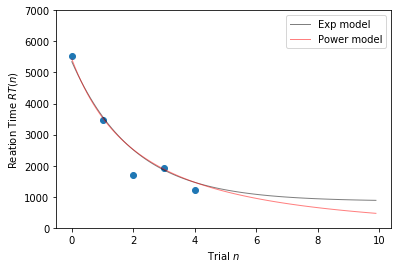

In [12]:
plt.scatter(n[::10], y[::10])
nfit = np.arange(0,10,.1)
plt.plot(nfit, model(bfit, x=nfit), alpha=.5, linewidth=1, color='black', label='Exp model')
plt.plot(nfit, model2(bfit2, x=nfit), alpha=.5, linewidth=1, color='red', label='Power model')
plt.xlabel('Trial $n$')
plt.ylabel('Reation Time $RT(n)$')
plt.xticks(range(0,11,2))
plt.ylim([0,7000])
plt.legend()
plt.savefig('assignment2_figure1.png')
print(y[::10])

In [13]:
rmse(bfit)

312.48828759886743

In [14]:
f(a,b,c,6)

1199.1482734714557

In [15]:
rmse(bfit, x=n[::10], data=y[::10])

388.80118879774403

In [16]:
rmse2(bfit2, x=n[::10], data=y[::10])

383.54078509845993

In [17]:
rmse(bfit, x = np.concatenate([n[::10],[6]]), data =np.concatenate([y[::10],[1199]]))

358.3849083193466

In [18]:
rmse2(bfit2, x = np.concatenate([n[::10],[6]]), data =np.concatenate([y[::10],[1199]]))

364.8042516766831

In [19]:
y[::10]

array([5529., 3469., 1706., 1939., 1227.])

In [20]:
"{0:.2f} {1:.2f} {2:.2f}".format(*bfit)

'851.27 4496.13 0.50'

In [21]:
"{0:.2f} {1:.2f} {2:.2f} {3:.2f}".format(*bfit2)

'-243.40 30155.79 1.46 3.14'